# Load NetCDF file from a seachable STAC catalog

This notebook shows an example how to load a NetCDF file from a searchable STAC catalog.

A searchable catalog implements the [STAC API - Item Search](https://github.com/radiantearth/stac-api-spec/tree/release/v1.0.0/item-search) conformance class, which provides the ability to search for STAC Item objects across collections.

### Setup
In order to run this notebook you may install [`xcube_stac`](https://github.com/xcube-dev/xcube-stac), following the [README](../README.md).

Now, we first import everything we need:

In [1]:
%%time
from xcube.core.store import new_data_store, get_data_store_params_schema

CPU times: user 2.79 s, sys: 186 ms, total: 2.97 s
Wall time: 1.31 s


First, we get the store parameters needed to initialize a STAC [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). 

In [2]:
%%time
store_params = get_data_store_params_schema("stac")
store_params

CPU times: user 443 ms, sys: 48 ms, total: 491 ms
Wall time: 490 ms


We determine the url of the STAC catalog of the [DLR's Earth Observation Center (EOC)](https://geoservice.dlr.de/eoc/ogc/stac/v1/)  and initiate a STAC [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework) where the `xcube-stac` plugin is recognized by setting the first argument to `"stac"` in the `new_data_store` function.

In [3]:
%%time
store = new_data_store("stac", url="https://geoservice.dlr.de/eoc/ogc/stac/v1")

CPU times: user 10.4 ms, sys: 123 µs, total: 10.6 ms
Wall time: 152 ms


In the next step, we can search for items using search parameters. The following code shows which search parameters are available.

In [4]:
%%time
search_params = store.get_search_params_schema()
search_params

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 33.6 µs


Now, let's search for Sentinel-5P TROPOMI L3 Data of radiometric cloud fraction variable data (`S5P_TROPOMI_L3_P1D_CF`) for 18. June and 19. June 2024. Note that [item S5P_DLR_NRTI_01_040201_L3_CF_20240619](https://geoservice.dlr.de/eoc/ogc/stac/v1/collections/S5P_TROPOMI_L3_P1D_CF/items/S5P_DLR_NRTI_01_040201_L3_CF_20240619) covers the entire globe. We thus do not assign any `bbox` here. 

In [5]:
%%time
descriptors = list(
    store.search_data(
        collections=["S5P_TROPOMI_L3_P1D_CF"],
        time_range=["2024-06-18", "2024-06-20"],
    )
)
[d.to_dict() for d in descriptors]

CPU times: user 99.1 ms, sys: 5.52 ms, total: 105 ms
Wall time: 4.74 s


[{'data_id': 'collections/S5P_TROPOMI_L3_P1D_CF/items/S5P_DLR_NRTI_01_040201_L3_CF_20240621?f=application%2Fgeo%2Bjson',
  'data_type': 'dataset',
  'bbox': [-180.0, -90.0, 180.0, 90.0],
  'time_range': ('2024-06-20T23:27:10.122000Z',
   '2024-06-22T01:00:24.421000Z')},
 {'data_id': 'collections/S5P_TROPOMI_L3_P1D_CF/items/S5P_DLR_NRTI_01_040201_L3_CF_20240620?f=application%2Fgeo%2Bjson',
  'data_type': 'dataset',
  'bbox': [-180.0, -90.0, 180.0, 90.0],
  'time_range': ('2024-06-19T23:00:24.168000Z',
   '2024-06-21T00:25:34.520000Z')},
 {'data_id': 'collections/S5P_TROPOMI_L3_P1D_CF/items/S5P_DLR_NRTI_01_040201_L3_CF_20240619?f=application%2Fgeo%2Bjson',
  'data_type': 'dataset',
  'bbox': [-180.0, -90.0, 180.0, 90.0],
  'time_range': ('2024-06-18T23:05:24.649000Z',
   '2024-06-20T00:44:35.462000Z')},
 {'data_id': 'collections/S5P_TROPOMI_L3_P1D_CF/items/S5P_DLR_NRTI_01_040201_L3_CF_20240618?f=application%2Fgeo%2Bjson',
  'data_type': 'dataset',
  'bbox': [-180.0, -90.0, 180.0, 90.0],


In the next step, we can open the data for each data ID. The following code shows which parameters are available for opening the data.

In [6]:
%%time
open_params = store.get_open_data_params_schema()
open_params

CPU times: user 22 µs, sys: 2 µs, total: 24 µs
Wall time: 26.7 µs


We select the asset data, as this is the only asset, which links to a netcdf file, when investigating the [item S5P_DLR_NRTI_01_040201_L3_CF_20240619](https://geoservice.dlr.de/eoc/ogc/stac/v1/collections/S5P_TROPOMI_L3_P1D_CF/items/S5P_DLR_NRTI_01_040201_L3_CF_20240619).

In [7]:
%%time
ds = store.open_data(descriptors[1].data_id, asset_names=["data"])
ds

CPU times: user 101 ms, sys: 12.2 ms, total: 113 ms
Wall time: 2.96 s


<xarray.Dataset> Size: 130MB
Dimensions:                                    (lat: 1800, lon: 3600)
Coordinates:
  * lat                                        (lat) float32 7kB -89.95 ... 8...
  * lon                                        (lon) float32 14kB -179.9 ... ...
Data variables:
    data_radiometric_cloud_fraction            (lat, lon) float32 26MB dask.array<chunksize=(900, 1800), meta=np.ndarray>
    data_radiometric_cloud_fraction_precision  (lat, lon) float32 26MB dask.array<chunksize=(900, 1800), meta=np.ndarray>
    data_number_of_observations                (lat, lon) float64 52MB dask.array<chunksize=(900, 1800), meta=np.ndarray>
    data_quality_flag                          (lat, lon) float32 26MB dask.array<chunksize=(1800, 3600), meta=np.ndarray>
Attributes:
    stac_catalog_url:  https://geoservice.dlr.de/eoc/ogc/stac/v1
    stac_item_id:      S5P_DLR_NRTI_01_040201_L3_CF_20240620

We plot the loaded data as an example below.

CPU times: user 1.13 s, sys: 141 ms, total: 1.27 s
Wall time: 3.61 s


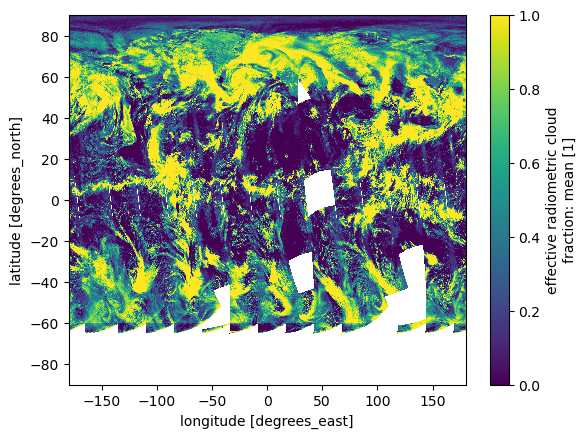

In [8]:
%%time
ds.data_radiometric_cloud_fraction.plot()